In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Data loading

In [91]:
nei = pd.read_csv('./data/summarySCC_PM25.csv', low_memory=False)
scc = pd.read_csv('./data/Source_Classification_Code.csv')

# 1. Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? Make a plot showing the total PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008

<AxesSubplot: xlabel='year', ylabel='Emissions'>

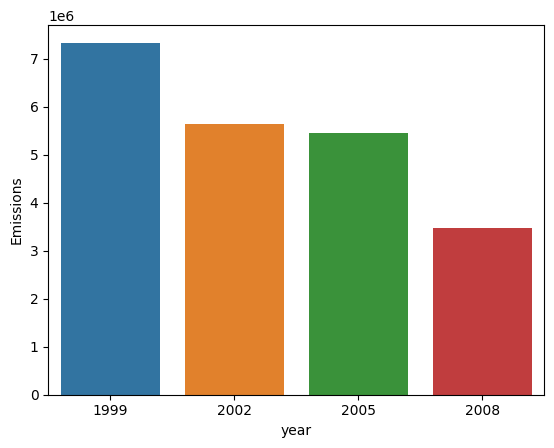

In [92]:
sns.barplot(data=nei, x="year", y="Emissions", estimator='sum', errorbar=None)

### Answer: Yes, they have.

# 2. Have total emissions from PM2.5 decreased in the Baltimore City, Maryland (fips == “24510”) from 1999 to 2008?

<AxesSubplot: xlabel='year', ylabel='Emissions'>

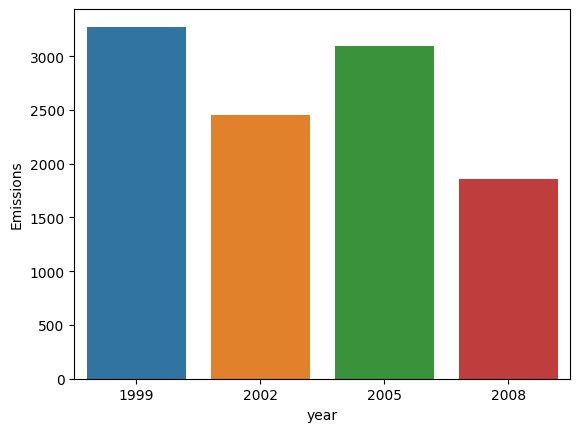

In [93]:
sns.barplot(data=nei[nei.fips=='24510'], x="year", y="Emissions", estimator='sum', errorbar=None)

### Answer: Yes, they have.

# 3. Of the four types of sources indicated by the type (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999–2008 for Baltimore City? Which have seen increases in emissions from 1999–2008?

<AxesSubplot: xlabel='type', ylabel='Emissions'>

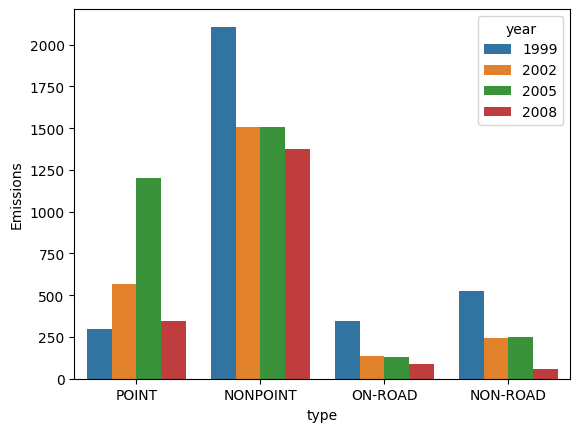

In [94]:
sns.barplot(data=nei[nei.fips=='24510'], x="type", y="Emissions", estimator='sum', hue='year', errorbar=None)

### Answer: Non-road, nonpoint, on-road have seen only decreases. Point have seen increases.

# 4. Across the United States, how have emissions from coal combustion-related sources changed from 1999–2008?


In [95]:
short_names = list(scc['Short.Name'].unique())
short_names = [str(i) for i in short_names]
coal_names = [i for i in short_names if 'Coal' in i]
scc_names = scc[scc['Short.Name'].isin(coal_names)].SCC.to_list()

<AxesSubplot: xlabel='year', ylabel='Emissions'>

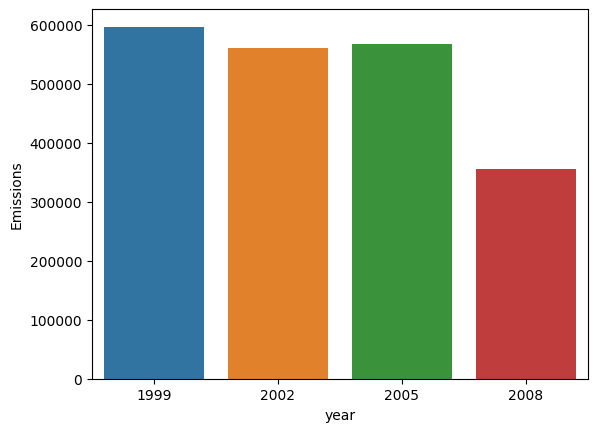

In [96]:
sns.barplot(data=nei[nei.SCC.isin(scc_names)], x="year", y="Emissions", estimator='sum', errorbar=None)

### Answer: Seriously decreased in 2008

# 5. How have emissions from motor vehicle sources changed from 1999–2008 in Baltimore City (EI.Sector starts from “Mobile”)?

In [97]:
selector_names = list(scc['EI.Sector'].unique())
selector_names = [str(i) for i in selector_names]
mobile_names = [i for i in selector_names if i.startswith('Mobile')]
scc_names = scc[scc['EI.Sector'].isin(mobile_names)].SCC.to_list()

<AxesSubplot: xlabel='year', ylabel='Emissions'>

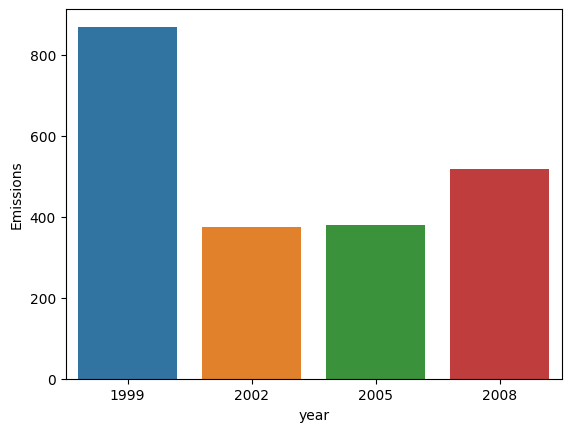

In [98]:
sns.barplot(data=nei[(nei.SCC.isin(scc_names))&(nei.fips=='24510')], x="year", y="Emissions", estimator='sum', errorbar=None)

### Answer: Generally decreased

# 6. Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in Los Angeles County, California (fips == “06037”). Which city has seen greater changes over time in motor vehicle emissions?

<AxesSubplot: xlabel='year', ylabel='Emissions'>

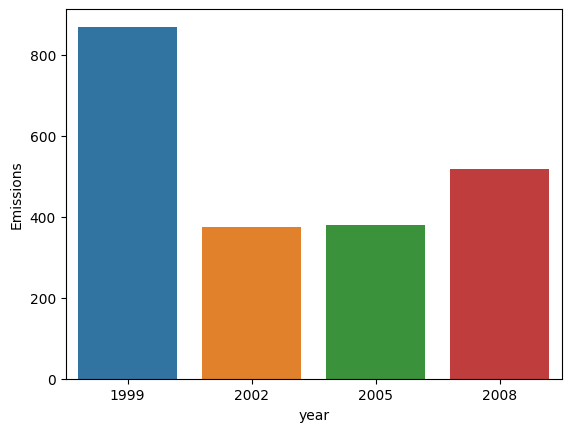

In [99]:
sns.barplot(data=nei[(nei.SCC.isin(scc_names))&(nei.fips=='24510')], x="year", y="Emissions", estimator='sum',errorbar=None)

<AxesSubplot: xlabel='year', ylabel='Emissions'>

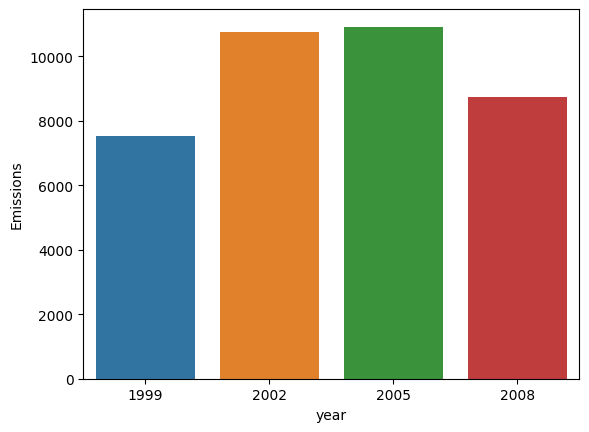

In [100]:
sns.barplot(data=nei[(nei.SCC.isin(scc_names))&(nei.fips=='06037')], x="year", y="Emissions", estimator='sum',errorbar=None)

<AxesSubplot: xlabel='fips', ylabel='Emissions'>

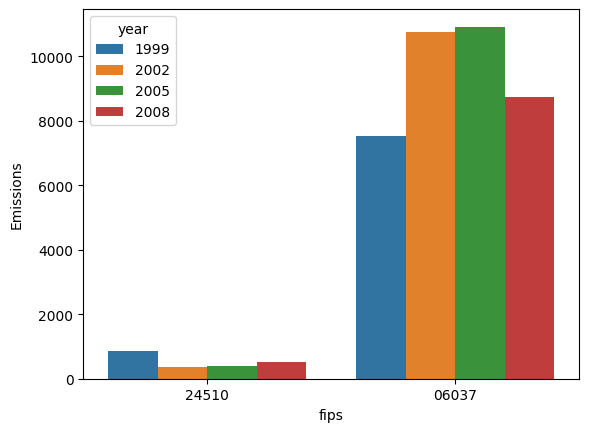

In [101]:
sns.barplot(data=nei[(nei.SCC.isin(scc_names))&((nei.fips=='24510')|(nei.fips=='06037'))], x="fips", y="Emissions", estimator='sum', hue='year',errorbar=None)

### Answer: Los Angeles County, California slightly increased. Baltimore City, Maryland - decreased.